# Page Visits Funnel for Uniqoo Pte Ltd
We will analyze data on visits to Uniqoo's website by building a funnel, which is a description of how many people continue to the next step of a multi-step process. For example, if a lot of users leave the website after adding items to the cart, the company may look for ways to make the checkout process faster and easier.

In this case, our funnel is going to describe the following process:
- A user visits CoolTShirts.com
- A user adds a t-shirt to their cart
- A user clicks “checkout”
- A user actually purchases a t-shirt

# Acquiring and Loading Data

## Library Import & Reading In Data

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
checkout = pd.read_csv('checkout.csv', parse_dates=[1])

checkout.drop_duplicates(['user_id'], inplace=True)
checkout.to_csv('checkout-dedupe.csv', index=False)

In [3]:
visits = pd.read_csv('visits.csv',
                     parse_dates=[1])
cart = pd.read_csv('cart.csv',
                   parse_dates=[1])
                   
checkout = pd.read_csv('checkout.csv',
                       parse_dates=[1])
purchase = pd.read_csv('purchase.csv',
                       parse_dates=[1])

# Exploratory Data Analysis

Step 1: Inspect the DataFrames using `print` and `head`

In [4]:
print(visits.head(5))
print(cart.head(5))
print(checkout.head(5))
print(purchase.head(5))

                                user_id          visit_time
0  943647ef-3682-4750-a2e1-918ba6f16188 2017-04-07 15:14:00
1  0c3a3dd0-fb64-4eac-bf84-ba069ce409f2 2017-01-26 14:24:00
2  6e0b2d60-4027-4d9a-babd-0e7d40859fb1 2017-08-20 08:23:00
3  6879527e-c5a6-4d14-b2da-50b85212b0ab 2017-11-04 18:15:00
4  a84327ff-5daa-4ba1-b789-d5b4caf81e96 2017-02-27 11:25:00
                                user_id           cart_time
0  2be90e7c-9cca-44e0-bcc5-124b945ff168 2017-11-07 20:45:00
1  4397f73f-1da3-4ab3-91af-762792e25973 2017-05-27 01:35:00
2  a9db3d4b-0a0a-4398-a55a-ebb2c7adf663 2017-03-04 10:38:00
3  b594862a-36c5-47d5-b818-6e9512b939b3 2017-09-27 08:22:00
4  a68a16e2-94f0-4ce8-8ce3-784af0bbb974 2017-07-26 15:48:00
                                user_id       checkout_time
0  d33bdc47-4afa-45bc-b4e4-dbe948e34c0d 2017-06-25 09:29:00
1  4ac186f0-9954-4fea-8a27-c081e428e34e 2017-04-07 20:11:00
2  3c9c78a7-124a-4b77-8d2e-e1926e011e7d 2017-07-13 11:38:00
3  89fe330a-8966-4756-8f7c-3bdbcd47279a 

In [5]:
visits.head(5)

,user_id,visit_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00


In [6]:
cart.head(5)

,user_id,cart_time
0,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07 20:45:00
1,4397f73f-1da3-4ab3-91af-762792e25973,2017-05-27 01:35:00
2,a9db3d4b-0a0a-4398-a55a-ebb2c7adf663,2017-03-04 10:38:00
3,b594862a-36c5-47d5-b818-6e9512b939b3,2017-09-27 08:22:00
4,a68a16e2-94f0-4ce8-8ce3-784af0bbb974,2017-07-26 15:48:00


In [7]:
checkout.head(5)

,user_id,checkout_time
0,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25 09:29:00
1,4ac186f0-9954-4fea-8a27-c081e428e34e,2017-04-07 20:11:00
2,3c9c78a7-124a-4b77-8d2e-e1926e011e7d,2017-07-13 11:38:00
3,89fe330a-8966-4756-8f7c-3bdbcd47279a,2017-04-20 16:15:00
4,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:52:00


In [8]:
purchase.head(5)

,user_id,purchase_time
0,4b44ace4-2721-47a0-b24b-15fbfa2abf85,2017-05-11 04:25:00
1,02e684ae-a448-408f-a9ff-dcb4a5c99aac,2017-09-05 08:45:00
2,4b4bc391-749e-4b90-ab8f-4f6e3c84d6dc,2017-11-20 20:49:00
3,a5dbb25f-3c36-4103-9030-9f7c6241cd8d,2017-01-22 15:18:00
4,46a3186d-7f5a-4ab9-87af-84d05bfd4867,2017-06-11 11:32:00


Step 2: Left merging visits and cart

In [9]:
visits_cart = visits.merge(cart, how = 'left')

visits_cart.head()

,user_id,visit_time,cart_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00,NaT
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00,2017-08-20 08:31:00
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00,NaT
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00,NaT


Step 3: How long is the newly merged `visits_cart`?

In [10]:
total_visits = len(visits_cart)

print(total_visits)

2000


Step 4: How many timestamps are null for `cart_time`?

In [12]:
null_cart_times = len(visits_cart[visits_cart.cart_time.isnull()])

print(null_cart_times)

1652


*We see that `cart_time` has 1652 null values. This tells us that 1652 of the 2000 people who visited the site never made it to the cart.*

Step 5: What percentage only visited?

In [13]:
visited_not_cart = float(null_cart_times) / float(total_visits)

print(visited_not_cart)

0.826


Step 6: What percentage placed a t-shirt in their cart but did not checkout?

In [15]:
# merge cart with checkout
cart_checkout = cart.merge(checkout, how = 'left')

cart_checkout.head(5)

,user_id,cart_time,checkout_time
0,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07 20:45:00,2017-11-07 21:14:00
1,4397f73f-1da3-4ab3-91af-762792e25973,2017-05-27 01:35:00,NaT
2,a9db3d4b-0a0a-4398-a55a-ebb2c7adf663,2017-03-04 10:38:00,2017-03-04 11:04:00
3,b594862a-36c5-47d5-b818-6e9512b939b3,2017-09-27 08:22:00,2017-09-27 08:26:00
4,a68a16e2-94f0-4ce8-8ce3-784af0bbb974,2017-07-26 15:48:00,NaT


In [16]:
null_checkout_times = len(cart_checkout[cart_checkout.checkout_time.isnull()])

cart_not_checkout = float(null_checkout_times) / float(len(cart))

In [17]:
print("Cart but not checkout:", cart_not_checkout)

Cart but not checkout: 0.3505747126436782


Step 7: Merge it all together

In [18]:
all_data = visits_cart.merge(cart_checkout, how = 'left')\
    .merge(purchase, how = 'left')

print(all_data.head(5))

                                user_id          visit_time  \
0  943647ef-3682-4750-a2e1-918ba6f16188 2017-04-07 15:14:00   
1  0c3a3dd0-fb64-4eac-bf84-ba069ce409f2 2017-01-26 14:24:00   
2  6e0b2d60-4027-4d9a-babd-0e7d40859fb1 2017-08-20 08:23:00   
3  6879527e-c5a6-4d14-b2da-50b85212b0ab 2017-11-04 18:15:00   
4  a84327ff-5daa-4ba1-b789-d5b4caf81e96 2017-02-27 11:25:00   

            cart_time       checkout_time       purchase_time  
0                 NaT                 NaT                 NaT  
1 2017-01-26 14:44:00 2017-01-26 14:54:00 2017-01-26 15:08:00  
2 2017-08-20 08:31:00                 NaT                 NaT  
3                 NaT                 NaT                 NaT  
4                 NaT                 NaT                 NaT  


In [31]:
# Users who added to their cart
added_to_cart = all_data['cart_time'].notnull().sum()
added_to_cart

456

In [33]:
# Users who checked out
checked_out = all_data['checkout_time'].notnull().sum()
checked_out

334

In [34]:
# Users who purchased
purchased = all_data['purchase_time'].notnull().sum()
purchased

252

Step 8: % of users who got to checkout but did not purchase

In [20]:
reached_checkout = all_data[~all_data.checkout_time.isnull()]

checkout_not_purchase = all_data[(all_data.purchase_time.isnull()) & (~all_data.checkout_time.isnull())]

checkout_not_purchase_percent = float(len(checkout_not_purchase)) / float(len(reached_checkout))

print("% of users who got to checkout but did not purchase:",checkout_not_purchase_percent)

% of users who got to checkout but did not purchase: 0.24550898203592814


Step 9: check each part of the funnel, let's print all 3 of them again

In [21]:
print("{} percent of users who visited the page did not add a t-shirt to their cart".format(round(visited_not_cart*100, 2)))
print("{} percent of users who added a t-shirt to their cart did not checkout".format(round(cart_not_checkout*100, 2)))
print("{} percent of users who made it to checkout  did not purchase a shirt".format(round( checkout_not_purchase_percent*100, 2)))

82.6 percent of users who visited the page did not add a t-shirt to their cart
35.06 percent of users who added a t-shirt to their cart did not checkout
24.55 percent of users who made it to checkout  did not purchase a shirt


In [54]:
# Calculate the average time spent between different stages
all_data['time_to_cart'] = all_data['cart_time'] - all_data['visit_time']
all_data['time_to_checkout'] = all_data['checkout_time'] - all_data['cart_time']
all_data['time_to_purchase'] = all_data['purchase_time'] - all_data['checkout_time']

print(f"Average time to add to cart: {all_data['time_to_cart'].mean()}")
print(f"Average time to checkout: {all_data['time_to_checkout'].mean()}")
print(f"Average time to purchase: {all_data['time_to_purchase'].mean()}")

Average time to add to cart: 0 days 00:14:43.684210526
Average time to checkout: 0 days 00:14:28.742514970
Average time to purchase: 0 days 00:14:30.952380952


The weakest part of the funnel is clearly **getting a person who visited the site to add a tshirt to their cart**. Once they've added a t-shirt to their cart it is fairly likely they end up purchasing it. A suggestion could be to make the add-to-cart button more prominent on the front page.


Step 10: adding new column

In [22]:
all_data['time_to_purchase'] = all_data.purchase_time - all_data.visit_time

Step 11: examine the results

In [23]:
print(all_data.time_to_purchase)

0                  NaT
1      0 days 00:44:00
2                  NaT
3                  NaT
4                  NaT
             ...      
2103               NaT
2104               NaT
2105               NaT
2106               NaT
2107               NaT
Name: time_to_purchase, Length: 2108, dtype: timedelta64[ns]


Step 12: average time to purchase

In [24]:
print(all_data.time_to_purchase.mean())

0 days 00:43:12.380952380


# Data Visualisation

## Drop-off at each stage

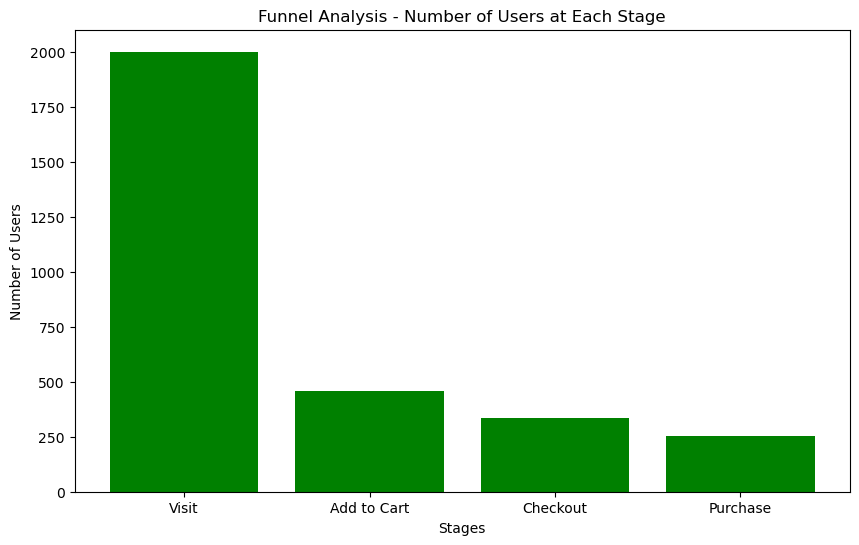

In [39]:
stages = ['Visit', 'Add to Cart', 'Checkout', 'Purchase']
counts = [total_visits, added_to_cart, checked_out, purchased]

plt.figure(figsize=(10, 6))
plt.bar(stages, counts, color='green')
plt.xlabel('Stages')
plt.ylabel('Number of Users')
plt.title('Funnel Analysis - Number of Users at Each Stage')
plt.show()

## Investigate Conversion Patterns

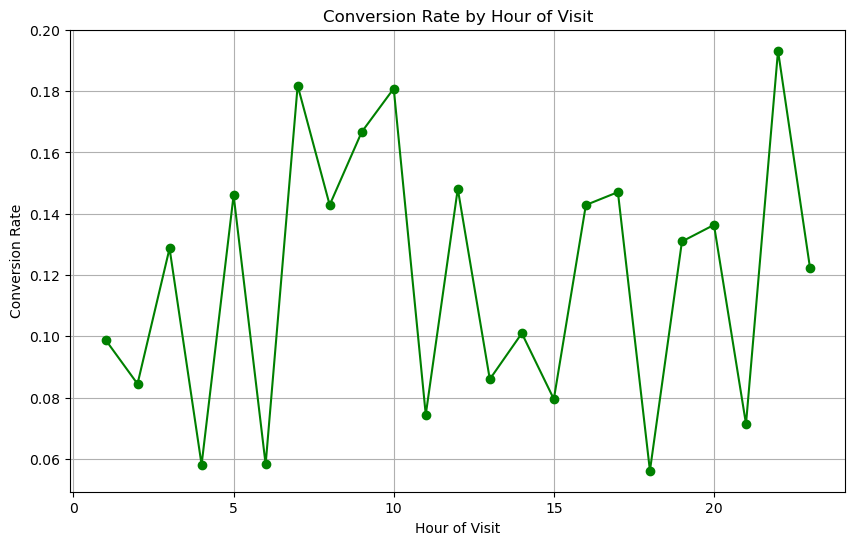

In [47]:
all_data['visit_hour'] = all_data['visit_time'].dt.hour
conversion_by_hour = all_data.groupby('visit_hour')['purchase_time'].count() / all_data.groupby('visit_hour')['visit_time'].count()

plt.figure(figsize=(10, 6))
plt.plot(conversion_by_hour.index, conversion_by_hour.values, marker='o', linestyle='-', color='g')
plt.xlabel('Hour of Visit')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Hour of Visit')
plt.grid(True)
plt.show()

In [49]:
print("\nConversion rates by hour of the day:\n", conversion_by_hour)


Conversion rates by hour of the day:
 visit_hour
1     0.098901
2     0.084507
3     0.128713
4     0.058140
5     0.146067
6     0.058252
7     0.181818
8     0.142857
9     0.166667
10    0.180851
11    0.074468
12    0.148148
13    0.086022
14    0.101010
15    0.079545
16    0.142857
17    0.147059
18    0.056180
19    0.130952
20    0.136364
21    0.071429
22    0.193182
23    0.122222
dtype: float64


In [57]:
# Users spending above average time without adding to cart may be likely to drop off
avg_time_to_cart = all_data['time_spent_cart'].mean()
potential_dropoffs = all_data[all_data['time_spent_cart'] > avg_time_to_cart]
print("\nPotential drop-off users who took longer than average to add to cart:")
print(potential_dropoffs[['user_id', 'visit_time', 'time_spent_cart']])


Potential drop-off users who took longer than average to add to cart:
                                   user_id          visit_time  \
1     0c3a3dd0-fb64-4eac-bf84-ba069ce409f2 2017-01-26 14:24:00   
2     6e0b2d60-4027-4d9a-babd-0e7d40859fb1 2017-08-20 08:23:00   
14    486480e2-98c3-4d51-8f4b-b1c07228ce84 2017-01-27 16:34:00   
31    1868e912-b38c-4ef0-8824-5665c42288e5 2017-03-17 11:48:00   
37    6d11f38d-03f5-486e-a62d-e05a2e39786b 2017-09-15 16:08:00   
...                                    ...                 ...   
2077  13019e8b-8ec9-4adc-9660-8c6337575ab8 2017-07-20 12:21:00   
2078  5cda3654-faab-4432-ae28-0edca81de2f5 2017-08-23 08:29:00   
2089  5565358d-c9c2-4491-8299-78f0428521dc 2017-01-11 17:49:00   
2093  f46c88d0-2441-40a8-97fe-6841ff6f050d 2017-09-06 08:42:00   
2095  1f2eb2e0-7afe-4ebd-acc4-9534d6ad9eed 2017-11-21 17:53:00   

      time_spent_cart  
1              1200.0  
2               480.0  
14              600.0  
31              480.0  
37             1

In [59]:
# Users spending above average time without adding to cart may be likely to drop off
avg_time_to_cart = all_data['time_spent_cart'].mean()
potential_dropoffs = all_data[all_data['time_spent_cart'] > avg_time_to_cart]
print("\nPotential drop-off users who took longer than average to add to cart:")
print(potential_dropoffs[['user_id', 'visit_time', 'time_spent_cart']])


Potential drop-off users who took longer than average to add to cart:
                                   user_id          visit_time  \
1     0c3a3dd0-fb64-4eac-bf84-ba069ce409f2 2017-01-26 14:24:00   
2     6e0b2d60-4027-4d9a-babd-0e7d40859fb1 2017-08-20 08:23:00   
14    486480e2-98c3-4d51-8f4b-b1c07228ce84 2017-01-27 16:34:00   
31    1868e912-b38c-4ef0-8824-5665c42288e5 2017-03-17 11:48:00   
37    6d11f38d-03f5-486e-a62d-e05a2e39786b 2017-09-15 16:08:00   
...                                    ...                 ...   
2077  13019e8b-8ec9-4adc-9660-8c6337575ab8 2017-07-20 12:21:00   
2078  5cda3654-faab-4432-ae28-0edca81de2f5 2017-08-23 08:29:00   
2089  5565358d-c9c2-4491-8299-78f0428521dc 2017-01-11 17:49:00   
2093  f46c88d0-2441-40a8-97fe-6841ff6f050d 2017-09-06 08:42:00   
2095  1f2eb2e0-7afe-4ebd-acc4-9534d6ad9eed 2017-11-21 17:53:00   

      time_spent_cart  
1              1200.0  
2               480.0  
14              600.0  
31              480.0  
37             1

# Suggested Actions

Enhance the Landing Page:
- Improve the visibility of the "Add to Cart" button and make sure it stands out. Test different designs/colors to see what drives better results.
- Add customer testimonials, product highlights, or limited-time offers to incentivize users to take action sooner.

Reduce Cart Abandonment:
- Introduce exit-intent popups for users leaving their cart without checking out, offering discounts or assistance.
- Enable guest checkout and show a clear progress bar during the checkout process to let users know how much time it will take.

Improve Trust & Reduce Friction:
- Ensure there are no surprise costs that could deter users, such as high shipping fees.